In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from pandas import read_csv
df = read_csv('Fish.csv')
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [ ]:
df.rename(columns={'Length1':'Vertical_length(cm)', 'Length2':'Length(cm)', 'Length3':'Diagonal_length(cm)', 'Weight' : 'Weight(gr)', 'Height' : 'Height(cm)' , 'Width' : 'Width(cm)'}, inplace=True)
df.head(2)

,Species,Weight(gr),Vertical_length(cm),Length(cm),Diagonal_length(cm),Height(cm),Width(cm)
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [ ]:
df=df.drop([142,143,144], axis=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Species', axis = 1))
scaled_features=scaler.transform(df.drop('Species', axis = 1))

In [ ]:
df_feat=pd.DataFrame(scaled_features, columns=df.columns[1:])
df_feat.head()

,Weight(gr),Vertical_length(cm),Length(cm),Diagonal_length(cm),Height(cm),Width(cm)
0,-0.418237,-0.270151,-0.244492,-0.053574,0.595965,-0.213412
1,-0.267541,-0.182146,-0.152290,0.058986,0.818680,-0.042068
2,-0.110565,-0.193146,-0.131801,0.049606,0.794970,0.192211
3,-0.038356,0.070870,0.124315,0.274725,0.876678,0.047864
4,0.171991,0.092871,0.124315,0.321624,0.810328,0.454927


In [ ]:
X=df_feat
y=df[['Species']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Species'],
                                                    test_size=0.30, random_state=42)

In [ ]:
accuracy_rate=[]

for i in range(1,40):
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy_rate.append(knn.score(X_test,y_test))

Text(0, 0.5, 'accuracy_rate')

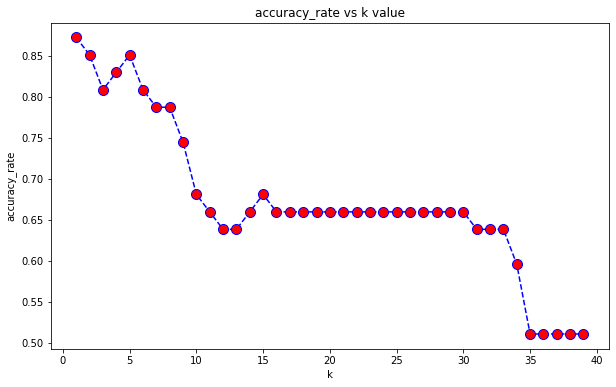

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs k value')
plt.xlabel(' k ')
plt.ylabel('accuracy_rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[11  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  1 16  0  1  0  0]
 [ 0  0  1  6  0  0  0]
 [ 0  0  2  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  2  0  0  0  0]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       0.75      1.00      0.86         3
       Perch       0.76      0.89      0.82        18
        Pike       1.00      0.86      0.92         7
       Roach       0.67      0.50      0.57         4
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.85        47
   macro avg       0.74      0.75      0.74        47
weighted avg       0.82      0.85      0.83        47



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_rate=[]

for i in range(1,40):

  knn=KNeighborsClassifier(n_neighbors= i)
  score=cross_val_score(knn,X,y,cv=10)
  accuracy_rate.append(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

Text(0, 0.5, 'accuracy_rate')

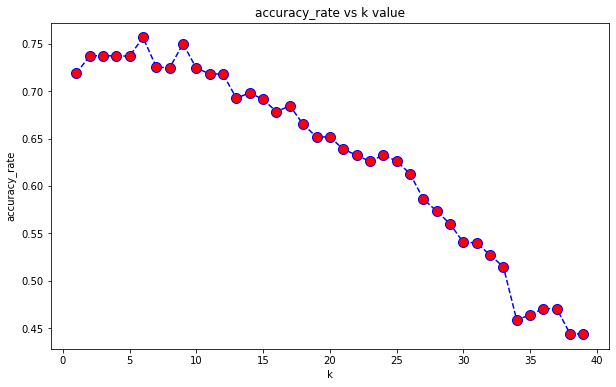

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs k value')
plt.xlabel(' k ')
plt.ylabel('accuracy_rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors= 6)
score=cross_val_score(knn,X,y,cv=10)
print(score.mean())

0.7566666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
knn=KNeighborsClassifier(n_neighbors= 6)
scores=cross_val_score(knn,X,y,cv=skfold)
print(np.mean(scores))

0.7566666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [ ]:
from sklearn.model_selection import LeaveOneOut
knn=KNeighborsClassifier(n_neighbors= 6)
leave_validation=LeaveOneOut()
results=cross_val_score(knn,X,y,cv=leave_validation)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.7756410256410257


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
from sklearn.model_selection import ShuffleSplit
knn=KNeighborsClassifier(n_neighbors= 6)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)
results=cross_val_score(knn,X,y,cv=ssplit)
print(np.mean(results))

0.7765957446808511


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear',C=10,gamma= 'auto')
model.fit(X,y)
model.score(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9551282051282052

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(), {
    'C': [1,10,20,30,35,40],
    'kernel': ['linear','poly'],
    'gamma': ['auto','scale'],
    'degree' : [3,4,5]
}, cv=10)
clf.fit(X,y)
clf.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

{'mean_fit_time': array([0.00315108, 0.00274658, 0.00275362, 0.00341806, 0.0033123 ,
        0.00341551, 0.00280843, 0.00329742, 0.00298245, 0.00280926,
        0.00278494, 0.00279007, 0.00276954, 0.00330582, 0.00325692,
        0.0029783 , 0.00289357, 0.00469463, 0.00338383, 0.00396359,
        0.00292323, 0.00331388, 0.00344088, 0.00334542, 0.00399528,
        0.00278904, 0.00383809, 0.00293472, 0.00312204, 0.00413375,
        0.00359075, 0.00473404, 0.00357018, 0.00295339, 0.00376096,
        0.00295386, 0.00344713, 0.00286808, 0.00408528, 0.00308881,
        0.00334516, 0.00427618, 0.00360632, 0.00480878, 0.00376654,
        0.00326438, 0.00397534, 0.00312192, 0.00340807, 0.00281937,
        0.00363803, 0.00329785, 0.00335882, 0.00508704, 0.0036355 ,
        0.00518358, 0.00348034, 0.00328538, 0.00400746, 0.00305493,
        0.00362256, 0.00268729, 0.00375073, 0.00349491, 0.00456998,
        0.00470808, 0.00441475, 0.00502222, 0.00361023, 0.00324838,
        0.00448422, 0.00332596]

In [ ]:
newdf = pd.DataFrame(clf.cv_results_)
newdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003151,0.001046,0.000960,0.000074,1,3,auto,linear,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",0.4375,0.8750,0.875,0.8750,0.8750,0.8125,0.800000,0.800000,0.733333,0.733333,0.781667,0.126329,31
1,0.002747,0.000104,0.000919,0.000039,1,3,auto,poly,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",0.2500,0.3750,0.500,0.6250,0.8125,0.7500,0.733333,0.733333,0.666667,0.666667,0.611250,0.171635,68
2,0.002754,0.000102,0.000908,0.000032,1,3,scale,linear,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.4375,0.8750,0.875,0.8750,0.8750,0.8125,0.800000,0.800000,0.733333,0.733333,0.781667,0.126329,31
3,0.003418,0.000605,0.001163,0.000243,1,3,scale,poly,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.2500,0.3750,0.500,0.6250,0.8125,0.7500,0.733333,0.733333,0.666667,0.733333,0.617917,0.174921,66
4,0.003312,0.001107,0.001040,0.000165,1,4,auto,linear,"{'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel...",0.4375,0.8750,0.875,0.8750,0.8750,0.8125,0.800000,0.800000,0.733333,0.733333,0.781667,0.126329,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.005022,0.001512,0.001309,0.000652,40,4,scale,poly,"{'C': 40, 'degree': 4, 'gamma': 'scale', 'kern...",0.2500,0.5625,0.875,0.8750,0.8125,0.8125,0.733333,0.666667,0.666667,0.466667,0.672083,0.189196,52
68,0.003610,0.000642,0.000930,0.000037,40,5,auto,linear,"{'C': 40, 'degree': 5, 'gamma': 'auto', 'kerne...",0.5000,1.0000,1.000,1.0000,1.0000,0.9375,0.933333,0.866667,0.866667,0.866667,0.897083,0.143445,1
69,0.003248,0.000120,0.000965,0.000028,40,5,auto,poly,"{'C': 40, 'degree': 5, 'gamma': 'auto', 'kerne...",0.3125,0.6250,0.625,0.8125,0.8125,0.7500,0.666667,0.733333,0.733333,0.733333,0.680417,0.137778,47
70,0.004484,0.001783,0.001174,0.000258,40,5,scale,linear,"{'C': 40, 'degree': 5, 'gamma': 'scale', 'kern...",0.5000,1.0000,1.000,1.0000,1.0000,0.9375,0.933333,0.866667,0.866667,0.866667,0.897083,0.143445,1


In [ ]:
newdf[['param_C','param_kernel', 'param_degree', 'param_gamma','mean_test_score']]

,param_C,param_kernel,param_degree,param_gamma,mean_test_score
0,1,linear,3,auto,0.781667
1,1,poly,3,auto,0.611250
2,1,linear,3,scale,0.781667
3,1,poly,3,scale,0.617917
4,1,linear,4,auto,0.781667
...,...,...,...,...,...
67,40,poly,4,scale,0.672083
68,40,linear,5,auto,0.897083
69,40,poly,5,auto,0.680417
70,40,linear,5,scale,0.897083


In [ ]:
clf.best_params_

{'C': 30, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.8970833333333333

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=42)

In [ ]:
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=30, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[11  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 17  0  0  0  1]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  2  0  0]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         3
       Perch       1.00      0.94      0.97        18
        Pike       1.00      1.00      1.00         7
       Roach       0.67      1.00      0.80         4
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        47
   macro avg       0.81      0.85      0.82        47
weighted avg       0.93      0.94      0.93        47



In [ ]:
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
score=cross_val_score(model,X,y,cv=10)
print(score.mean())

0.8970833333333333


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.8970833333333333


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [ ]:
from sklearn.model_selection import LeaveOneOut
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.9358974358974359


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
from sklearn.model_selection import ShuffleSplit
model = svm.SVC(kernel='linear',C=30,gamma= 'auto',degree=3)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)
results=cross_val_score(model,X,y,cv=ssplit)
print(np.mean(results))

0.902127659574468


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 23.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X,y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 16.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=42)

In [ ]:
model=best_grid
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[11  0  0  0  0  0  0]
 [ 0  2  0  0  1  0  0]
 [ 1  0 14  0  3  0  0]
 [ 0  0  1  6  0  0  0]
 [ 0  0  3  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  2  0  0]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Bream       0.92      1.00      0.96        11
      Parkki       1.00      0.67      0.80         3
       Perch       0.78      0.78      0.78        18
        Pike       1.00      0.86      0.92         7
       Roach       0.14      0.25      0.18         4
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.77        47
   macro avg       0.69      0.65      0.66        47
weighted avg       0.78      0.77      0.77        47



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score
model=best_grid
score=cross_val_score(model,X,y,cv=10)
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.6875


In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=best_grid
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.6933333333333332


In [ ]:
from sklearn.model_selection import LeaveOneOut
model=best_grid
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.7692307692307693


In [ ]:
from sklearn.model_selection import ShuffleSplit
model=best_grid
ssplit=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)
results=cross_val_score(model,X,y,cv=ssplit)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.7425531914893618
